In [ ]:
!pip install pandas shapely matplotlib

Done! Saved 7666 points to 'filtered_locations_outside.csv'


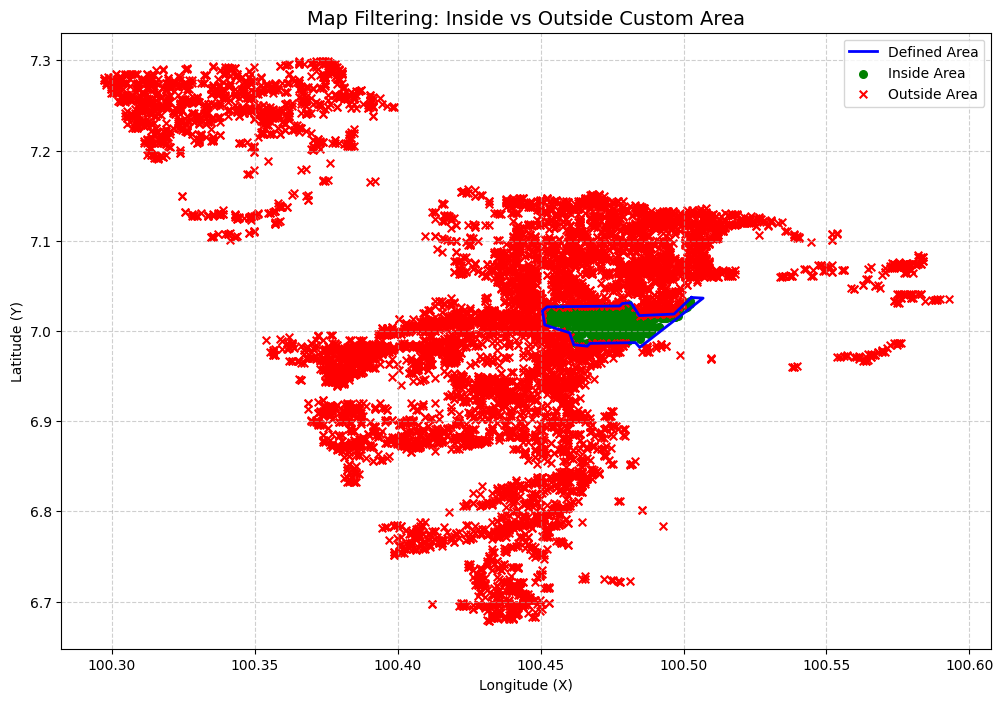

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

file_path = 'data/raw/flood/bc5_20251124_2200.csv'
df = pd.read_csv(file_path)

area_coordinates = [
    (100.502769, 7.037112),
    (100.506839, 7.036403),
    (100.484659, 6.981756),
    (100.483150, 6.987053),
    (100.467264, 6.986236),
    (100.466289, 6.983138),
    (100.461562, 6.984726),
    (100.460087, 6.997991),
    (100.451423, 7.006697),
    (100.450599, 7.022179),
    (100.452207, 7.026726),
    (100.477673, 7.027629),
    (100.478553, 7.030400),
    (100.481593, 7.031277),
    (100.484508, 7.017035),
    (100.496636, 7.018713)
]

# Create the Polygon object
target_area = Polygon(area_coordinates)

# --- Step 4: Perform the Filtering ---
# This function checks if a coordinate is inside the boundary
def is_inside_area(row):
    point = Point(row['x'], row['y'])
    return target_area.contains(point)

# Apply the check to every row
df['is_inside'] = df.apply(is_inside_area, axis=1)

# Split into two dataframes
df_inside = df[df['is_inside'] == True].copy()
df_outside = df[df['is_inside'] == False].copy()

# --- Step 5: Save the filtered results ---
df_outside.to_csv('data/tmp/filtered_locations_outside.csv', index=False)
df_inside.to_csv('data/tmp/filtered_locations_inside.csv', index=False)
print(f"Done! Saved {len(df_outside)} points to 'data/tmp/filtered_locations_outside.csv'")

# --- Step 6: Visualize the result ---
plt.figure(figsize=(12, 8))

# 1. Draw the Custom Boundary
poly_x, poly_y = target_area.exterior.xy
plt.plot(poly_x, poly_y, color='blue', linewidth=2, label='Defined Area')
plt.fill(poly_x, poly_y, color='blue', alpha=0.1)

# 2. Draw the Points
plt.scatter(df_inside['x'], df_inside['y'], color='green', s=30, label='Inside Area')
plt.scatter(df_outside['x'], df_outside['y'], color='red', marker='x', s=30, label='Outside Area')

# 3. Add Labels
plt.title('Map Filtering: Inside vs Outside Custom Area', fontsize=14)
plt.xlabel('Longitude (X)')
plt.ylabel('Latitude (Y)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()